# Try k-means on the data shown in figure 1c

1. dataset - do the same sets as Scala et al.'s article. First use Yao et al.'s UMI counts, then use Scala et al.'s exon/intron counts
2. will do t-SNE representation used in figure 1c, and if possible try on common gene count representation after that
3. parameter tuning: number of clusters
4. evaluation method: adjusted rand index, normalized mutual information, homogeneity, completeness and V-measure, Fowlkes-Mallows

In [2]:
import pickle
from collections import namedtuple
import numpy as np
import os.path
from preprocess_figdata import preprocess_figure_data
from sklearn.cluster import KMeans
from plot_fig1c import plot_sidebyside

In [3]:
# load Yao et al.'s dataset for the Vip/Lamp5 cells
m1data = pickle.load(open('../../data/processed/reduced-allen-data/10X_cells_v2_AIBS.pickle', 'rb'))["viplamp"]

# load the study results of Scala et al.
houstonData = namedtuple('houstonData', 'exonCounts intronCounts cells genes layers cre yields traced \
                                         depth thickness ephys ephysNames exclude \
                                         mice_ages mice_cres morphometrics morphometricsNames zProfiles \
                                         exonLengths intronLengths')
m1 = pickle.load(open('../../data/processed/rnaseq/m1.pickle', 'rb'))

#load transcriptomic type assignment from Scala et al.
ttypes = pickle.load(open('../../data/processed/rnaseq/ttypes.pickle', 'rb'))
subset = np.isin(ttypes['family'], ['Lamp5', 'Vip']) #mask to get vip/lamp5 cell info from m1

# load t-SNE representations of Yao et al.'s Vip/Lamp5 cells
Z = pickle.load(open('../../data/processed/rnaseq/10x-tsne-viplamp.pickle', 'rb')) 

In [4]:
# if the datasets are not preprocessed and put into pickle files yet, do it now
UMIcnt_path = "../../data/clustering_datasets/viplamp_umi.pickle"
exintex_path = "../../data/clustering_datasets/viplamp_exint.pickle"

if (os.path.isfile(UMIcnt_path)==False) and (os.path.isfile(exintex_path)==False):
    preprocess_figure_data(m1data['counts'], m1data['genes'], m1.exonCounts[subset,:], m1.intronCounts[subset,:], 
                    m1.genes, m1.exonLengths, m1.intronLengths, UMI_fname=UMIcnt_path, 
                    exint_fname=exintex_path)

In [5]:
test_kmeans = KMeans(n_clusters=2, random_state=0).fit_predict(Z)

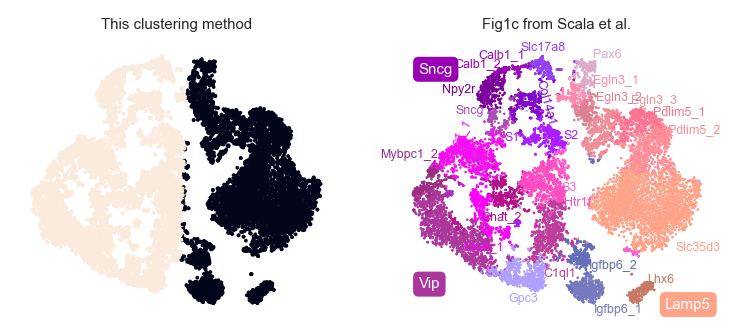

In [6]:
plot_sidebyside(test_kmeans, Z, m1data, title="This clustering method")